K = 1, Accuracy = 0.711
K = 2, Accuracy = 0.733
K = 3, Accuracy = 0.800
K = 4, Accuracy = 0.756
K = 5, Accuracy = 0.778
K = 6, Accuracy = 0.822
K = 7, Accuracy = 0.800
K = 8, Accuracy = 0.800
K = 9, Accuracy = 0.822
K = 10, Accuracy = 0.733

Best K value: 6

Final Model Accuracy: 0.8222222222222222

Confusion Matrix:
[[19  0  0]
 [ 0 10  3]
 [ 0  5  8]]


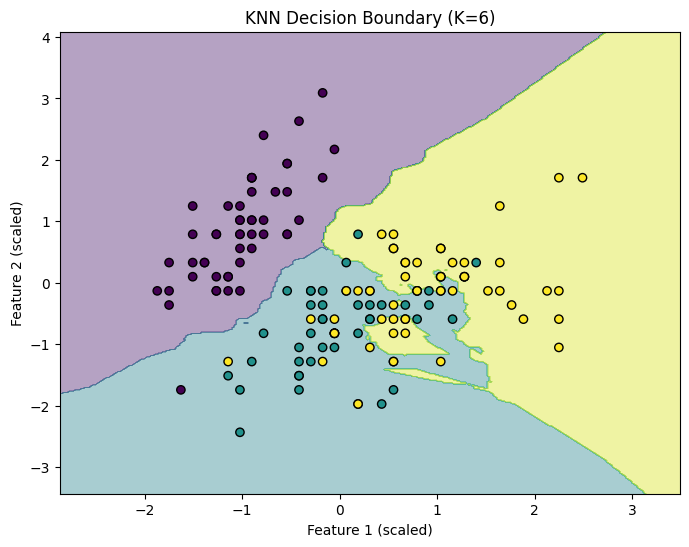

In [1]:
# Task 6: K-Nearest Neighbors (KNN) Classification
# Dataset used: Iris (built-in dataset)

# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# -----------------------------
# 2. Load Dataset
# -----------------------------
iris = load_iris()
X = iris.data[:, :2]    # Using only first 2 features for decision boundary
y = iris.target

# -----------------------------
# 3. Normalize Features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# -----------------------------
# 5. Try Different K Values
# -----------------------------
accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.3f}")

best_k = np.argmax(accuracies) + 1
print(f"\nBest K value: {best_k}")

# -----------------------------
# 6. Train Final Model
# -----------------------------
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -----------------------------
# 7. Evaluation
# -----------------------------
print("\nFinal Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# -----------------------------
# 8. Visualize Decision Boundary
# -----------------------------
h = 0.02  # step size for grid

# Create meshgrid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k')
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
